In [1]:
# Step 0: Import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Step 1: Load data
df_raw = pd.read_csv("../real_estate.csv", sep=";")

df_raw.sample(10)

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
12646,12647,153509076,False,outletdeviviendas,912172097.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,NaN,66.0,48062,...,0,0,0,0,0,0,"40,2023202","-3,58204980000005",NaN,NaN
9266,9267,152277274,False,redpiso vallecas puente vallecas,910759413.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,87.0,145000,...,0,0,0,0,0,0,"40,391328","-3,671361",NaN,NaN
13678,13679,152313269,False,inmobiliaria el casito,914898772.0,https://www.fotocasa.es/es/comprar/vivienda/vi...,2.0,1.0,NaN,105000,...,0,0,0,0,0,0,"40,72901","-3,58005",NaN,NaN
1815,1816,152264268,False,grupo a7r,914892938.0,https://www.fotocasa.es/vivienda/madrid-capita...,2.0,2.0,96.0,225000,...,0,0,0,0,0,1,"40,2413228","-3,6949651",NaN,NaN
257,258,152718962,False,sinergical inmobiliaria,NaN,https://www.fotocasa.es/es/comprar/vivienda/vi...,4.0,2.0,209.0,279000,...,0,0,0,0,0,1,"40,30914","-3,93366",NaN,NaN
2128,2129,152606768,False,pryconsa,911368119.0,https://www.fotocasa.es/es/comprar/vivienda/vi...,1.0,NaN,63.0,336000,...,0,0,0,0,0,0,"40,49805","-3,67505",NaN,NaN
6061,6062,152846405,False,hipoges iberia,914894861.0,https://www.fotocasa.es/es/comprar/vivienda/ti...,4.0,1.0,196.0,158000,...,0,0,0,0,0,0,"40,44051","-3,644395",NaN,NaN
2713,2714,153997738,False,daurum estate,912179743.0,https://www.fotocasa.es/es/comprar/vivienda/pa...,4.0,3.0,295.0,340000,...,0,0,0,0,0,0,"40,46925","-4,07462",NaN,NaN
14757,14758,153914186,False,particular,NaN,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,NaN,NaN,280000,...,0,0,0,0,0,1,"40,20355","-3,88051",NaN,NaN
9138,9139,152771757,False,distrito getafe i,912172393.0,https://www.fotocasa.es/es/comprar/vivienda/po...,3.0,1.0,70.0,133000,...,0,0,0,0,0,0,"40,31368","-3,72077",NaN,NaN


In [3]:
# Step 2: Data cleaning and preprocessing

df_baking = df_raw.copy()

df_baking = df_baking.iloc[:, 1:-2]

df_baking["date"] = pd.to_datetime(df_baking["date"], errors="coerce") # Force the datetaime transformation even when there's errors

df_baking.columns = df_baking.columns.str.lower() # lower case the columns name and make them strings


dropped_cols = df_baking.columns[23:32]
df_baking = df_baking.drop(columns=dropped_cols)
df_baking = df_baking.drop(columns=["countryid", "country"])


categorical_columns = ["id_realestates", "phone_realestate", "realestate_name", "description", "address"]

for col in categorical_columns:
    df_baking[col] = df_baking[col].astype("category")

# Replace commas in lat and long with decimal points
df_baking["latitude"] = df_baking["latitude"].str.replace(",", ".").astype(float)
df_baking["longitude"] = df_baking["longitude"].str.replace(",", ".").astype(float)

df_baking['price'].describe(
)

count    1.533500e+04
mean     4.773036e+05
std      5.912942e+05
min      0.000000e+00
25%      1.690000e+05
50%      2.800000e+05
75%      5.400000e+05
max      8.500000e+06
Name: price, dtype: float64

Exercise 01. What is the most expensive house in the entire dataset? (★☆☆)

In [4]:
# df_baking[df_baking['price'] == df_baking['price'].max()]

df_baking.sort_values(by='price', ascending=False).head(1)

,id_realestates,isnew,realestate_name,phone_realestate,url_inmueble,rooms,bathrooms,surface,price,date,...,level2,level3,level4,level5,level6,level7,level8,upperlevel,latitude,longitude
13110,132042636,False,engel volkers torrelodones,911798512.0,https://www.fotocasa.es/es/comprar/vivienda/vi...,19.0,NaN,NaN,8500000,NaT,...,Madrid,Zona Noroeste,"El Escorial, Zona de",El Escorial,NaN,Centro - Manquilla,NaN,Centro - Manquilla,40.58308,-4.129519


Exercise 02. What is the cheapest house in the dataset? (★☆☆)

In [5]:
cheapest_house = df_baking[df_baking['price'] != 0].sort_values(by='price', ascending=False)[['address', 'price']].head(1)

cheapest_house['price']

13110    8500000
Name: price, dtype: int64


Exercise 03. What is the largest and smallest house in the dataset? (★☆☆)

Print the address and area of the selected houses. For example:

The largest house is located at Calle Gran Vía, Nº38, and its area is 5000 square meters.

The smallest house is located at Calle Mayor, Nº12, and its area is 200 square meters.

This exercise is similar to the previous one, but we are looking for the largest and smallest houses based on their area.


In [ ]:
df = df_baking.copy()

# Use reset_index to access values through loc and iloc properly. reset_index creates a column with an index based on the position
# though with drop=True that column is dropped.
df_by_surface = df.dropna(subset=['surface']).sort_values(by='surface', ascending=False)[['address', 'surface']].reset_index(drop=True)

largest_house = f"The largest house is located at {df_by_surface.loc[0, 'address']}, and its area is {df_by_surface.loc[0, 'surface']}"
smallest_house = f"The smallest house is located at {df_by_surface.iloc[-1, 0]}, and its area is {df_by_surface.iloc[-1, 1]}"

display(largest_house)
display(smallest_house)

display(df_by_surface)

'The largest house is located at Sevilla la Nueva, and its area is 249000.0'

'The smallest house is located at Calle Amparo,  Madrid Capital, and its area is 15.0'

,address,surface
0,Sevilla la Nueva,249000.0
1,"Calle Apd 4 Los Carrizos, 357, Arroyomolinos (...",66666.0
2,"Calle Paraje Monte de Valdeoliva, San Agustín ...",16853.0
3,Navarredonda,5504.0
4,"Calle Canario 2 Los Ranchos, Galapagar",5083.0
...,...,...
14080,"Los Peñascales, Madrid Capital",21.0
14081,"Arquitectura, Madrid Capital",21.0
14082,Madrid Capital,18.0
14083,Madrid Capital,18.0



Exercise 04. How many unique populations are in the dataset? (★☆☆)

Count the number of unique populations in the 'level5' column and print the names of the populations separated by commas. For example:

print(populations)

population1, population2, population3, ...


In [7]:
populations = df["level5"].unique().tolist()

print(", ".join(populations))

Arganda del Rey, Fuenlabrada, Boadilla del Monte, Las Rozas de Madrid,  Madrid Capital, Villaviciosa de Odón, Pinto, Valdemoro, Navalcarnero, Pozuelo de Alarcón, Torrejón de Ardoz, Navalagamella, San Sebastián de los Reyes, Rivas-vaciamadrid, Alpedrete, Móstoles, San Fernando de Henares, Coslada, Becerril de la Sierra, Alcalá de Henares, Chinchón, Parla, Alcorcón, El Escorial, Leganés, Pedrezuela, Majadahonda, Villanueva de la Cañada, Villanueva del Pardillo, Torrelodones, Moralzarzal, Mejorada del Campo, Aranjuez, Corpa, Getafe, Velilla de San Antonio, Sevilla la Nueva, San Martín de la Vega, Villalbilla, Collado Villalba, Alcobendas, El Molar (Madrid), Moraleja de Enmedio, Algete, Campo Real, Torrejón de la Calzada, Colmenar Viejo, Valdemorillo, Fuente El Saz de Jarama, Tres Cantos, Arroyomolinos (Madrid), Griñón, Paracuellos de Jarama, Guadarrama, Titulcia, Galapagar, Collado Mediano, Los Molinos, San Lorenzo de El Escorial, Loeches, San Martín de Valdeiglesias, Navas del Rey, Busta


Exercise 05. Does the dataset contain null values (NAs)? (★☆☆)

Print a boolean (True or False) to check if there are null values, followed by the columns that contain NAs.


In [8]:
df.isna().sum()

id_realestates          0
isnew                   0
realestate_name        10
phone_realestate      794
url_inmueble            0
rooms                 353
bathrooms             345
surface              1250
price                   0
date                14652
description           142
address                 0
level1                  0
level2                  0
level3                  0
level4               6643
level5                  0
level6              14627
level7               2277
level8               8579
upperlevel              0
latitude                0
longitude               0
dtype: int64


Exercise 06. Remove the null values (NAs) from the dataset, if applicable (★★☆)

After removing the null values, compare the size of the DataFrame before and after the removal.


In [9]:
df.dropna(subset=["surface"])

,id_realestates,isnew,realestate_name,phone_realestate,url_inmueble,rooms,bathrooms,surface,price,date,...,level2,level3,level4,level5,level6,level7,level8,upperlevel,latitude,longitude
0,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,2019-12-28 18:27:15.997502700+00:00,...,Madrid,Madrid Sureste - Cuenca Tajuña,"Arganda del Rey, Zona de",Arganda del Rey,NaN,Perlita,NaN,Perlita,40.294828,-3.444024
2,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,2019-12-28 18:27:15.997502700+00:00,...,Madrid,Zona Noroeste,"Boadilla del Monte, Zona de",Boadilla del Monte,NaN,Sector B,NaN,Sector B,40.411565,-3.906623
3,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,2019-12-28 18:27:15.997502700+00:00,...,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,40.285379,-3.795081
4,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,2019-12-28 18:27:15.997502700+00:00,...,Madrid,Madrid Sureste - Cuenca Tajuña,"Arganda del Rey, Zona de",Arganda del Rey,NaN,Centro,NaN,Centro,40.299877,-3.452263
5,153934794,False,expimad,912780412.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,70.0,315000,2019-12-28 18:27:15.968054700+00:00,...,Madrid,Zona Noroeste,"Las Rozas de Madrid, Zona de",Las Rozas de Madrid,NaN,El Pinar - Punta Galea,NaN,El Pinar - Punta Galea,40.533910,-3.894450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,NaT,...,Madrid,"Madrid, Zona de",NaN,Madrid Capital,NaN,Tetuán,Berruguete,Berruguete,40.454160,-3.702860
15331,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,NaT,...,Madrid,Madrid Sureste - Cuenca Tajuña,"Velilla de San Antonio, Zona de",Velilla de San Antonio,NaN,NaN,NaN,Velilla de San Antonio,40.366520,-3.489510
15332,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,NaT,...,Madrid,Zona Noroeste,"Torrelodones, Zona de",Torrelodones,NaN,Casco Antiguo,NaN,Casco Antiguo,40.574440,-3.921240
15333,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,NaT,...,Madrid,Madrid Sureste - Cuenca Tajuña,"Velilla de San Antonio, Zona de",Velilla de San Antonio,NaN,NaN,NaN,Velilla de San Antonio,40.369670,-3.481050


Exercise 07. What is the average price in the population of "Arroyomolinos (Madrid)"? (★★☆)

In [10]:
price_arroyomolinos = df[(df['price'] != 0) & (df['level5']=="Arroyomolinos (Madrid)")]['price']


print("The average price in Arroyomolinos, Madrid is $", round(price_arroyomolinos.mean(), 1))

The average price in Arroyomolinos, Madrid is $ 298905.2



Exercise 08. Plot the histogram of prices for the population of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

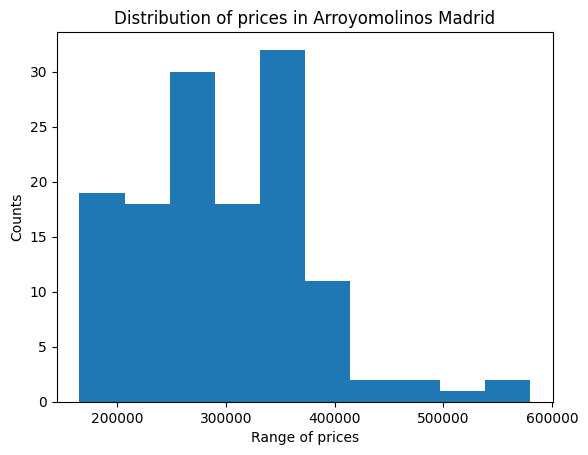

In [11]:
plt.hist(price_arroyomolinos, bins=10)
plt.xlabel("Range of prices")
plt.ylabel("Counts")
plt.title("Distribution of prices in Arroyomolinos Madrid")
plt.show()

- Most prices range between 160,000 and 400,000. 
- The most common housing price is around 380,000, while there are a few outliers up to more than 550,000.
- There are no houses less than 100,000 in Arroyomolinos Madrid. 


Exercise 09. Are the average prices of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about them.


In [12]:
avg_valdemorillo = df[df['level5']=='Valdemorillo']['price'].mean()
avg_galapagar = df[df['level5']=='Galapagar']['price'].mean()

print(round(avg_valdemorillo, 1))
print(round(avg_galapagar, 1))

363860.3
360063.2



Exercise 10. Are the average prices per square meter (price/m2) of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about it.

Hint: Create a new column called pps (price per square meter) and then analyze the values.


In [13]:
city1 = "Valdemorillo"
city2 = "Galapagar"

pps_valdemorillo = df.assign(pps=df['price']/df['surface']).query("level5==@city1")["pps"].mean()
pps_galapagar = df.assign(pps=df['price']/df['surface']).query("level5==@city2")["pps"].mean()

print("Avg price in Valdemorillo is", round(pps_valdemorillo, 1))
print("Avg price in Galapagar is", round(pps_galapagar, 1))


Avg price in Valdemorillo is 1318.0
Avg price in Galapagar is 1606.3



Exercise 11. Analyze the relation between the surface and the price of the houses (★★☆)

Hint: You can make a scatter plot, then write a conclusion about it.


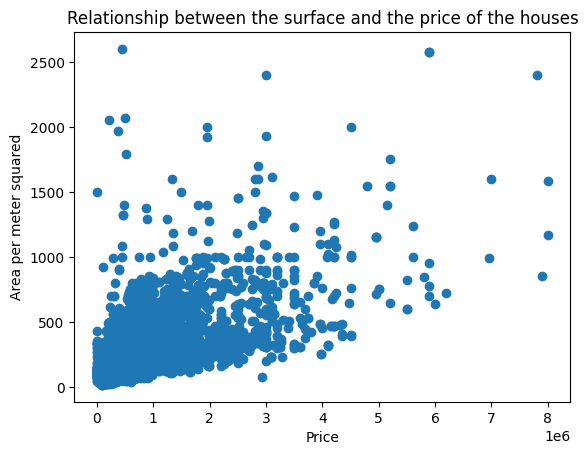

In [14]:
surface_filtered = df[df['surface'] < 3000]

plt.scatter(surface_filtered['price'], surface_filtered['surface'])
plt.xlabel("Price")
plt.ylabel("Area per meter squared")
plt.title("Relationship between the surface and the price of the houses")
plt.show()


Exercise 12. How many real estate agencies does the dataset contain? (★★☆)

Print the obtained value.


In [15]:
agencies = df['realestate_name'].unique().shape[0]

print(f"There are {agencies} in the dataset")

There are 1822 in the dataset



Exercise 13. Which is the population (level5 column) that contains the most houses? (★★☆)

Print both the population and the number of houses.


In [16]:
df.groupby(by="level5").size().sort_values(ascending=False)




level5
 Madrid Capital         6643
Alcalá de Henares        525
Las Rozas de Madrid      383
Móstoles                 325
Getafe                   290
                        ... 
Montejo de la Sierra       1
Lozoya                     1
Pinilla del Valle          1
Rascafría                  1
Piñuécar-gandullas         1
Length: 168, dtype: int64


Exercise 14. Now let's work with the "south belt" of Madrid. Make a subset of the original DataFrame that contains the following populations (level5 column): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Hint: Filter the original DataFrame using the column level5 and the function isin.


In [17]:
south_belt = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]

south_belt_df = df[df['level5'].isin(south_belt)]


Exercise 15. Make a bar plot of the median of the prices and explain what you observe (you must use the subset obtained in Exercise 14) (★★★)

Print the bar of the median of the prices and write in the Markdown cell a brief analysis about the plot.

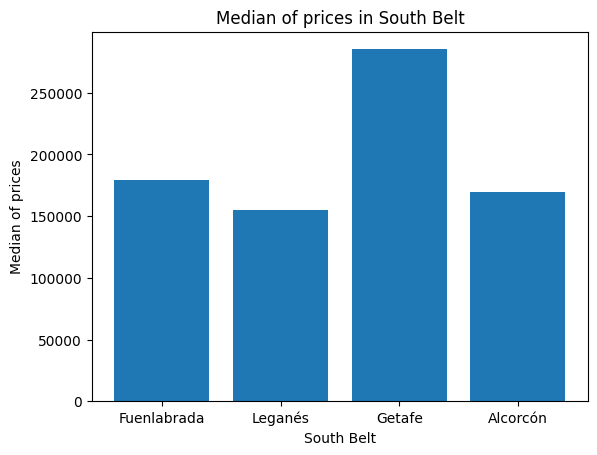

In [18]:
south_belt_df_grouped = south_belt_df.groupby(by="level5")

plt.bar(south_belt, south_belt_df_grouped['price'].median())
plt.xlabel("South Belt")
plt.ylabel("Median of prices")
plt.title("Median of prices in South Belt")
plt.show()


Exercise 16. Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (you must use the subset obtained in Exercise 14) (★★★)

Print both values for each variable.


In [19]:
price = south_belt_df['price']
rooms = south_belt_df['rooms']
surface_area = south_belt_df['surface']
bathrooms = south_belt_df['bathrooms']

data = {
    "price": [price.mean(), price.var()],
    "rooms": [rooms.mean(), rooms.var()],
    "surface_area": [surface_area.mean(), surface_area.var()],
    "bathrooms": [bathrooms.mean(), bathrooms.var()]
}

pd.DataFrame(data, index=["mean", "var"])

,price,rooms,surface_area,bathrooms
mean,2.230945e+05,3.017738,111.752224,1.633222
var,1.492137e+10,0.718886,4263.051760,0.571797



Exercise 17. What is the most expensive house in each population? You must use the subset obtained in Exercise 14 (★★☆)

Print both the address and the price of the selected house of each population. You can print a DataFrame or a single line for each population.


In [20]:
south_belt_df_grouped.agg({"price":"max"})

,price
level5,
Alcorcón,950000
Fuenlabrada,490000
Getafe,1050000
Leganés,650000



Exercise 18. Normalize the variable of prices for each population and plot the 4 histograms in the same plot (you must use the subset obtained in Exercise 14) (★★★)

For the normalization method, you can use the one you consider; there is not a single correct answer to this question. Print the plot and write in the Markdown cell a brief analysis about the plot.

Hint: You can help yourself by reviewing the multihist demo of Matplotlib.


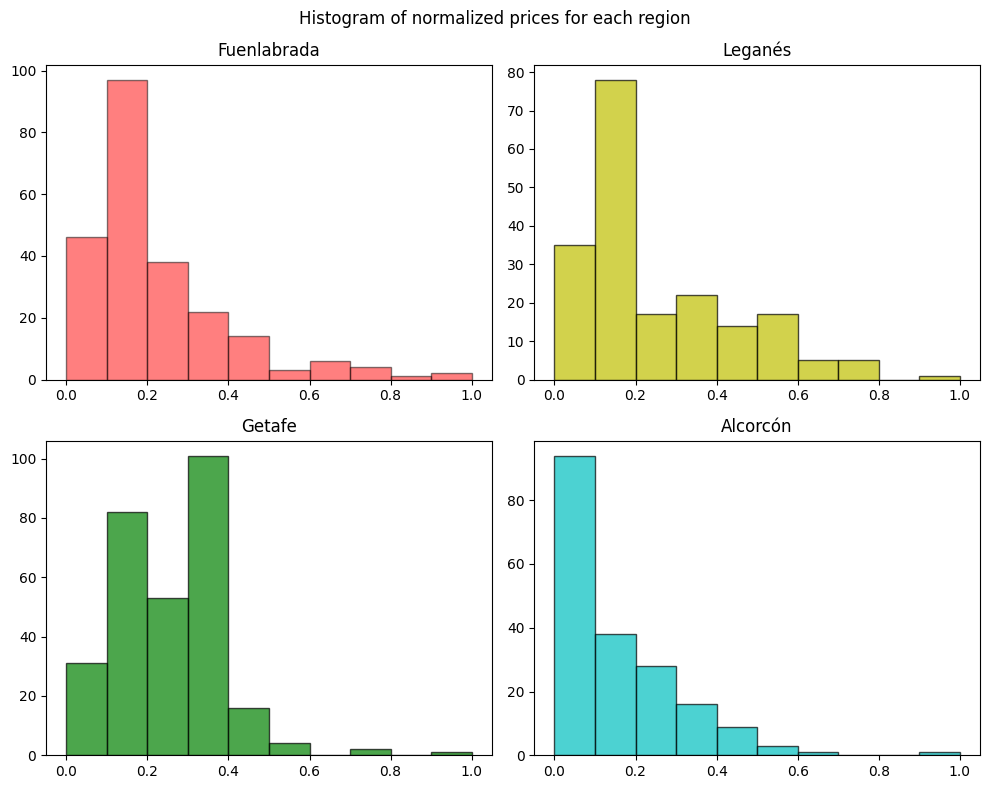

In [21]:
# ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]
fuenlabrada = south_belt_df.loc[south_belt_df['level5'] == "Fuenlabrada", ["price"]]
leganes = south_belt_df.loc[south_belt_df['level5'] == "Leganés", ["price"]]
getafe = south_belt_df.loc[south_belt_df['level5'] == "Getafe", ["price"]]
alarcon = south_belt_df.loc[south_belt_df['level5'] == "Alcorcón", ["price"]]

south = [fuenlabrada, leganes, getafe, alarcon]
normalized_data = []

# Normalizing prices

for data in south:
    min_val = np.min(data)
    max_val = np.max(data)

    normalized = (data - min_val) / (max_val - min_val) 

    normalized_data.append(normalized)


fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].hist(normalized_data[0], edgecolor='black', alpha=0.5, color='r')
axes[0, 0].set_title('Fuenlabrada')

axes[0, 1].hist(normalized_data[1], edgecolor='black', alpha=0.7, color='y')
axes[0, 1].set_title('Leganés')

axes[1, 0].hist(normalized_data[2], edgecolor='black', alpha=0.7, color='g')
axes[1, 0].set_title('Getafe')

axes[1, 1].hist(normalized_data[3], edgecolor='black', alpha=0.7, color='c')
axes[1, 1].set_title('Alcorcón')

plt.suptitle("Histogram of normalized prices for each region")
plt.tight_layout()
plt.show()



Exercise 19. What can you say about the price per square meter (price/m2) between the towns of "Getafe" and "Alcorcón"? You must use the subset obtained in Exercise 14 (★★☆)

Hint: Create a new column called pps (price per square meter) and then analyze the values.


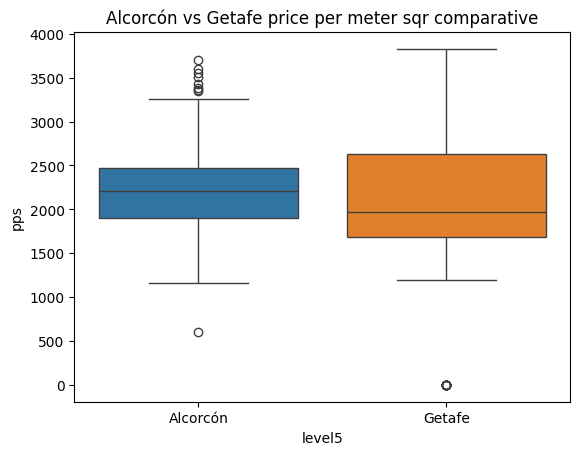

In [22]:
pd.options.mode.chained_assignment = None # Ignore warning of using a copy of df

south_belt_df['pps'] = south_belt_df['price'] / south_belt_df['surface']

# Filter pps from Getafe and Alcorcón
get_alar_pps = south_belt_df.loc[south_belt_df['level5'].isin(['Getafe', 'Alcorcón']), ['pps', 'level5']]

sns.boxplot(data=get_alar_pps, x='level5', y='pps', hue='level5')
plt.title('Alcorcón vs Getafe price per meter sqr comparative')

plt.show()

Exercise 20. Make the same plot for 4 different populations (level5 column) and rearrange them on the same graph. You must use the subset obtained in Exercise 14 (★★☆)

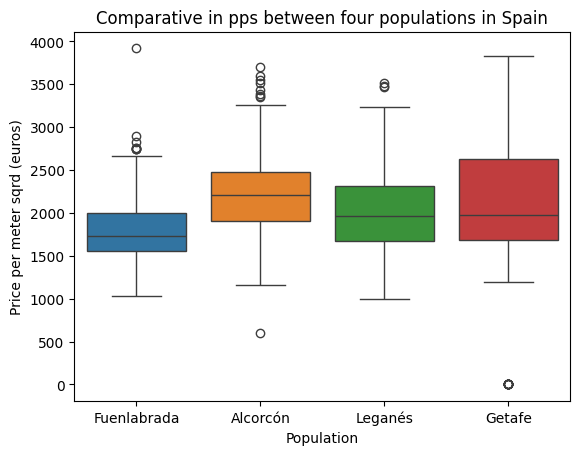

In [23]:
# south belt = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]

south_belt_pps = south_belt_df[['level5', 'pps']]

sns.boxplot(data=south_belt_df, x='level5', y='pps', hue='level5')
plt.ylabel("Price per meter sqrd (euros)")
plt.xlabel("Population")
plt.title("Comparative in pps between four populations in Spain")

plt.show()



Exercise 21. Make a plot of the coordinates (latitude and longitude columns) of the south belt of Madrid by color of each population (you must use the subset obtained in Exercise 14) (★★★★)

In [24]:
from ipyleaflet import Map, basemaps, Marker

map = Map(basemap=basemaps.OpenStreetMap.Mapnik, center=(40.35, -3.8), zoom=11.5)

map

Map(center=[40.35, -3.8], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

In [25]:
latitude = south_belt_df['latitude'].tolist()
longitude = south_belt_df['longitude'].tolist()

coordinates = list(zip(latitude, longitude))

for coor in coordinates:
    marker = Marker(location=coor)
    map.add(marker) 

map

Map(center=[40.35, -3.8], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

## **Conclusiones**

- Conclusión 1: Los datos nunca vienen limpios. Hay que limpiarlos tanto técnica como lógicamente y el data scientist es el encargado de decidir bajo su propio criterio lo que se queda y lo que se va. 
- Conclusión 2: Es importante hacer copias del dataframe original, así como hacer comentarios sobre el proceso lógico que va haciendo el Data Scientist. Todos los pasos deben estar estructurados y sin asumir nada, puesto que el código está hecho para que otras personas trabajen sobre él. 
- Conclusión 3: Se aprende practicando